# Performing iterative operations in pandas

In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
bike_data = pd.read_csv('data/bk_daily.csv')

In [3]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Not the fastest way
for index, row in bike_data.iterrows():
    if row['cnt'] > 8500:
        print(index, row['dteday'], row['cnt'])

623 2012-09-15 8714
637 2012-09-29 8555


In [5]:
def get_average_temperature(row, col1, col2):
    return (row[col1] + row[col2]) / 2

In [6]:
# Incorrect way to modify df, you should never modify a dataframe you are iterating over (as it may br returning a
# copy instead of a view)
for index, row in bike_data.iterrows():
    row['avgtemp'] = get_average_temperature(row, 'temp', 'atemp')

In [7]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
def slow_method(data):
    # As it returns a copy need to save it
    new_data = pd.DataFrame(columns=list(data))
    for index, row in data.iterrows():
        row['avgtemp'] = get_average_temperature(row, 'temp', 'atemp')
        new_data = new_data.append(row)
    return new_data

In [9]:
timeit_res = %timeit -o slow_method(bike_data)

488 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
timeit_res

<TimeitResult : 488 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)>

In [11]:
new_data = slow_method(bike_data)
new_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,avgtemp
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0.353896
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0.358608
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0.192885
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0.206061
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0.228113


In [12]:
bike_data['avg_temp_apply'] = bike_data.apply(lambda x: get_average_temperature(x, 'temp', 'atemp'), axis=1)

In [13]:
bike_data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,avg_temp_apply
418,419,2012-02-23,1,1,2,0,4,1,1,0.454167,0.444446,0.554583,0.190913,516,4546,5062,0.449306
310,311,2011-11-07,4,0,11,0,1,1,1,0.395000,0.400871,0.758750,0.057225,373,3662,4035,0.397935
523,524,2012-06-07,2,1,6,0,4,1,1,0.602500,0.569442,0.567083,0.157350,1038,6456,7494,0.585971
114,115,2011-04-25,2,0,4,0,1,1,1,0.606667,0.574500,0.776667,0.185333,773,3300,4073,0.590583
657,658,2012-10-19,4,1,10,0,5,1,2,0.563333,0.537896,0.815000,0.134954,753,4671,5424,0.550615


In [14]:
%timeit bike_data.apply(lambda x: get_average_temperature(x, 'temp', 'atemp'), axis=1)

2.21 ms ± 27.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
# Faster than iterrows, can use column indicies or getattr function
for row in bike_data.itertuples():
    if row[16] > 8500:
        print(row[0], row[2], row[16])
        print(getattr(row, 'Index'), getattr(row, 'dteday'), getattr(row, 'cnt'))

623 2012-09-15 8714
623 2012-09-15 8714
637 2012-09-29 8555
637 2012-09-29 8555


# Evaluating expressions in pandas

In [16]:
data = pd.read_csv('data/bk_daily.csv')

In [17]:
def eval_average_temperature(data):
    new_df = pd.DataFrame(columns=list(data))
    for _, row in data.iterrows():
        row['average_temperature'] = pd.eval("(row['temp']+row['atemp'])/2", engine='python')
        new_df = new_df.append(row)
    return new_df

In [18]:
new_data = eval_average_temperature(data)

In [19]:
new_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,average_temperature
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0.353896
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0.358608
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0.192885
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0.206061
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0.228113


In [20]:
filtered_data = data.query('cnt > 5000')
filtered_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
119,120,2011-04-30,2,0,4,0,6,0,1,0.4725,0.464021,0.503333,0.235075,1965,3347,5312
140,141,2011-05-21,2,0,5,0,6,0,1,0.6025,0.571975,0.626667,0.120650,2258,3547,5805
153,154,2011-06-03,2,0,6,0,5,1,1,0.6200,0.587133,0.354167,0.253121,898,4414,5312
154,155,2011-06-04,2,0,6,0,6,0,1,0.6350,0.594696,0.456250,0.123142,1869,3473,5342
163,164,2011-06-13,2,0,6,0,1,1,1,0.6350,0.601654,0.494583,0.305350,863,4157,5020


In [21]:
condition = 5000
filtered_data = data.query('cnt > @condition')
filtered_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
119,120,2011-04-30,2,0,4,0,6,0,1,0.4725,0.464021,0.503333,0.235075,1965,3347,5312
140,141,2011-05-21,2,0,5,0,6,0,1,0.6025,0.571975,0.626667,0.120650,2258,3547,5805
153,154,2011-06-03,2,0,6,0,5,1,1,0.6200,0.587133,0.354167,0.253121,898,4414,5312
154,155,2011-06-04,2,0,6,0,6,0,1,0.6350,0.594696,0.456250,0.123142,1869,3473,5342
163,164,2011-06-13,2,0,6,0,1,1,1,0.6350,0.601654,0.494583,0.305350,863,4157,5020


In [22]:
condition01 = 0.5
filtered_data01 = data.query('cnt > @condition & temp > 0.5')
filtered_data01.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
140,141,2011-05-21,2,0,5,0,6,0,1,0.602500,0.571975,0.626667,0.120650,2258,3547,5805
153,154,2011-06-03,2,0,6,0,5,1,1,0.620000,0.587133,0.354167,0.253121,898,4414,5312
154,155,2011-06-04,2,0,6,0,6,0,1,0.635000,0.594696,0.456250,0.123142,1869,3473,5342
163,164,2011-06-13,2,0,6,0,1,1,1,0.635000,0.601654,0.494583,0.305350,863,4157,5020
165,166,2011-06-15,2,0,6,0,3,1,1,0.626667,0.587754,0.471667,0.167912,769,4411,5180


In [23]:
# denotes spring or summer
season = [2,3]
season_filter = data.query('season == @season')

In [24]:
# Shows all the outputs are either 2, 3 matching the condition
season_filter['season'].drop_duplicates().to_list()

[2, 3]

# Time series analysis in pandas

In [26]:
data = pd.read_csv('data/bk_daily.csv')

In [36]:
import matplotlib.pyplot as plt

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [29]:
data.shape

(731, 16)

In [30]:
data['dteday'] = data[['dteday']].apply(lambda x: pd.to_datetime(x))

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [32]:
data.set_index('dteday', inplace=True)
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [33]:
def daily_change(row):
    return row.pct_change() 

In [40]:
data['casual_pct'] = data[['casual']].apply(lambda x: daily_change(x))
data['regular_pct'] = data[['registered']].apply(lambda x: daily_change(x))
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,casual_pct,regular_pct
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN,NaN
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,-0.604230,0.024465
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,-0.083969,0.834328
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,-0.100000,0.183076
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,-0.240741,0.044017


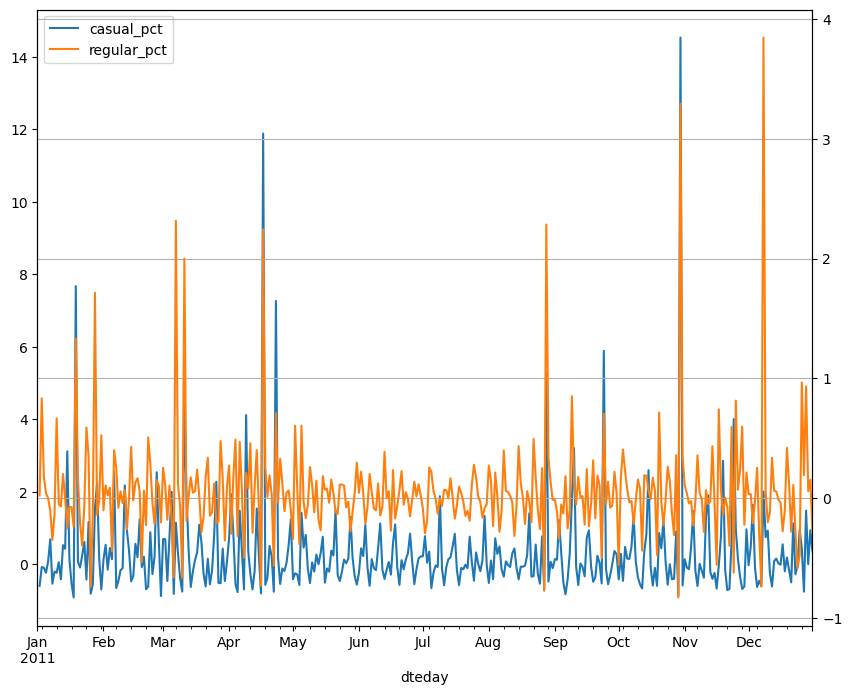

In [52]:
# Secondary y gives an alternative axis for regular_pct, not that useful with this graph imo
data.loc['2011-01-01':'2011-12-31', ['casual_pct', 'regular_pct']].plot(
    secondary_y=['regular_pct'],
    mark_right=False,
    grid=True,
    figsize=(10,8)
)
plt.show()

In [41]:
data['cnt_diff'] = data['cnt'].diff()

In [42]:
data[['cnt','cnt_diff']].head(10)

,cnt,cnt_diff
dteday,,
2011-01-01,985,NaN
2011-01-02,801,-184.0
2011-01-03,1349,548.0
2011-01-04,1562,213.0
2011-01-05,1600,38.0
2011-01-06,1606,6.0
2011-01-07,1510,-96.0
2011-01-08,959,-551.0
2011-01-09,822,-137.0


In [43]:
data['cnt_diff_n'] = data['cnt'].diff(periods=5)
data[['cnt','cnt_diff','cnt_diff_n']].head(10)

,cnt,cnt_diff,cnt_diff_n
dteday,,,
2011-01-01,985,NaN,NaN
2011-01-02,801,-184.0,NaN
2011-01-03,1349,548.0,NaN
2011-01-04,1562,213.0,NaN
2011-01-05,1600,38.0,NaN
2011-01-06,1606,6.0,621.0
2011-01-07,1510,-96.0,709.0
2011-01-08,959,-551.0,-390.0
2011-01-09,822,-137.0,-740.0


In [47]:
data['cnt_diff_following'] = data['cnt'].diff(periods=-1)
data[['cnt','cnt_diff','cnt_diff_n','cnt_diff_following']].tail(10)

,cnt,cnt_diff,cnt_diff_n,cnt_diff_following
dteday,,,,
2012-12-22,1749,-1874.0,-2836.0,-38.0
2012-12-23,1787,38.0,-3770.0,867.0
2012-12-24,920,-867.0,-4347.0,-93.0
2012-12-25,1013,93.0,-3115.0,572.0
2012-12-26,441,-572.0,-3182.0,-1673.0
2012-12-27,2114,1673.0,365.0,-981.0
2012-12-28,3095,981.0,1308.0,1754.0
2012-12-29,1341,-1754.0,421.0,-455.0
2012-12-30,1796,455.0,783.0,-933.0


In [48]:
data['ma_5'] = data['cnt'].rolling(window=5).mean()
data['ma_20'] = data['cnt'].rolling(window=20).mean()
data['ma_50'] = data['cnt'].rolling(window=50).mean()

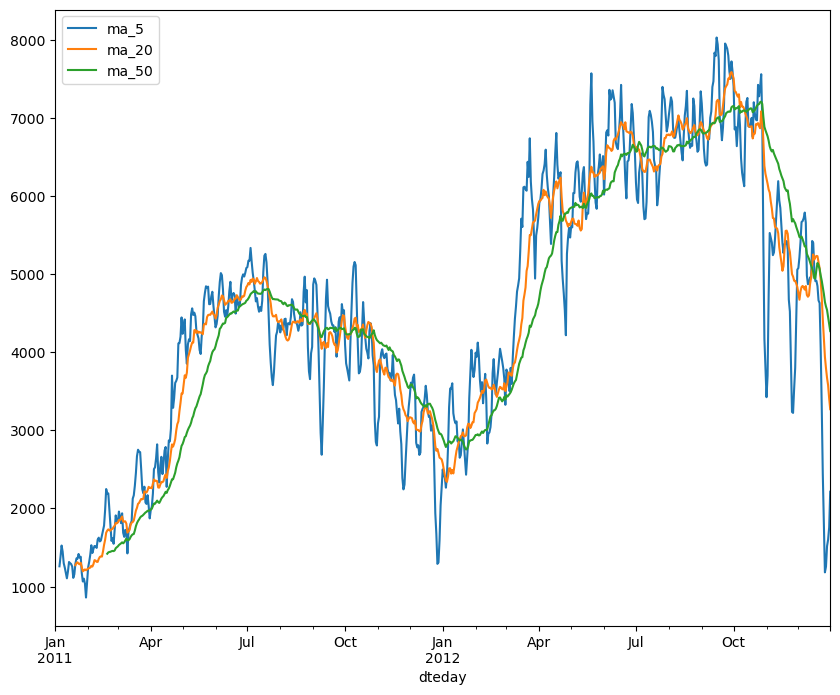

In [49]:
data['ma_5'].plot(figsize=(10,8))
data['ma_20'].plot(figsize=(10,8))
data['ma_50'].plot(figsize=(10,8))
plt.legend()
plt.show()

In [50]:
pd.date_range(start='2020/01/01', end='2020/01/10')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')